# Exploratory Data Anaylsis (EDA) of Breast Cancer Survival Dataset

## Table of Contents

1. [Problem Statement](#section1)<br><br>
2. [Data Loading and Description](#section2)<br><br>
3. [Data Profiling](#section3)<br>
    - 3.01 [Understanding the Dataset](#section301)<br/>
    - 3.02 [Pre Profiling](#section302)<br/>
    - 3.03 [Preprocessing](#section303)<br/>
    - 3.04 [Post Profiling](#section304)<br/><br/>    
4. [Questions](#section4)
    - 4.01 [Find the distribution of Age Groups in the Sample Population](#section401)<br/>
    - 4.02 [Find the count of Operations in a given range of year](#section402)<br/>
    - 4.03 [Find the distribution of patient by N Rating or Count of Positive Axillary Node](#section403)<br/>
    - 4.04 [Find the distribution of patient survived 5 years or longer by N Rating or Count of Positive Axillary Node](#section404)<br/>
    - 4.05 [Find the distribution of patient survived less than 5 years by N Rating or Count of Positive Axillary Node](#section405)<br/>
    - 4.06 [Find the relationship between Age & Year of Operation with the Survival Status](#section406)<br/>
    - 4.07 [Find the relationship between Age & Count of Aixllary Node with the survival status](#section407)<br/>
    - 4.08 [Find the relationship between count of Positive Axillary Lymph Node vs Age](#section408)<br/>
    - 4.09 [Find the relation between Survival Status vs Count of Positive Axillary Node detected](#section409)<br/>
    - 4.10 [Find the distribution of Years survived after operation against Count of Positive Node detected](#section410)<br/>
    - 4.11 [Find the relationship between Year of Operation and Survival Status through a Violin Plot](#section411)<br/>
    - 4.12 [Find the relationship between Age, Year of Operation, Count of Nodes detected and Survival Status'](#section412)<br/>
    - 4.13 [Find the relationship between Year of Operation & Survival status](#section413)<br/>
    - 4.14 [Find the relationship between Count of Nodes detected & Survival status](#section414)<br/>
    - 4.15 [Find the relationship between Age & Survival status](#section415)<br/>
    - 4.16 [Find the pattern between Age & Survival status](#section416)<br/>
    - 4.17 [Find the pattern between Year of Operation & Survival status](#section417)<br/>
    - 4.18 [Find the pattern between Count of Nodes detected & Survival status](#section418)<br/>
    - 4.19 [Establish co-orelation between all the features using heatmap.](#section419)<br/>
    - 4.20 [### 4.20 Hypothesis: Patients who had fewer Positive Axillary Nodes detected and got operated at a lower age has high likelihood to survive longer](#section420)<br/><br>
5. [Conclusions](#section5)<br/>  

### 1. Problem Statement

Perform Exploratory Data Analysis to predict whether a patient undergoing surgery for breast cancer survives for more than 5 years or not based on the age , year of operation and the number of positive axillary nodes detected.

In this notebook, we will explore the basic use of Pandas and will cover the basic commands of Exploratory Data Analysis(EDA) which includes cleaning, munging, combining, reshaping, slicing, dicing, and transforming data for analysis purpose.

Exploratory Data Analysis 

Understand the data by EDA and derive simple models with Pandas as baseline. EDA ia a critical and first step in analyzing the data and we do this for below reasons :
- Finding patterns in Data
- Determining relationships in Data
- Checking of assumptions
- Preliminary selection of appropriate models
- Detection of mistakes

### 2. Data Set Loading & Additional Information

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical) 
2. Patient's year of operation (year - 1900, numerical) 
3. Number of positive axillary nodes detected (numerical) 
4. Survival status (class attribute) 
    -- 1 = the patient survived 5 years or longer 
    -- 2 = the patient died within 5 year

- The dataset consists of the information about cancer patient and their survival status after operation based on age and count of positiive axillary node found in the patient.
- The dataset comprises of __306 observations of 4 columns__. Below is a table showing names of all the columns and their description.

Variables included in the dataset are as follows,

| Column Name         | Description                                         | 
| --------------------|-----------------------------------------------------| 
| Age                 | Age of the Cancer Patient at the time of operation  | 
| Years_of_operation  | Patient's year of operation                         |  
| Pos_axillary_nodes  | Number of Positive Axillary Nodes detected          | 
| Status              | Survival Status of the patient post operation       |

In [1]:
import numpy as np                 # lPython library to add support for large, multi-dimensional arrays and matrices, 
                                   # along with a large collection of high-level mathematical functions to operate on 
                                   # these arrays. 

import pandas as pd                # pandas is a software library written for the Python programming language for data
                                   # manipulation and analysis. In particular, it offers data structures and operations 
                                   # for manipulating numerical tables and time series

import pandas_profiling as pp      # python module that helps in automating the first-level of EDA. Data profiling is 
                                   # about summarizing your dataset through descriptive statistics. 

import matplotlib.pyplot as plt    # Plotting library for Python programming language and it's numerical mathematics extension
                                   # NumPy

import seaborn as sns              # Provides a high level interface for drawing attractive and informative statistical graphics

# %matplotlib inline sets the backend of matplotlib to the inline backend. With this backend, the output of plotting commands is displayed 
# inline within frontends like the Jupyter notebook, directly below the code cell that produced it.

%matplotlib inline

sns.set()                          # Set aesthetic parameters for seaborn graphs in one step.

import warnings
warnings.filterwarnings("ignore") # Discard or ignore warnings, if any.

#### Importing the Breat Cancer Survival Dataset

In [2]:
bcs_data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/Breast_cancer_survival.csv")

## 3. Data Profiling

- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.
- Then with the help of __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will analyze the data and add new features to understand the data better. 
- Again we will do __pandas profiling__ to see how preprocessing have transformed our dataset.

### 3.1 Understanding the Dataset

To gain insights from data we must look into each aspect of it very carefully. We will start with observing few rows and columns of data both from the starting and from the end.

In [3]:
bcs_data.shape

(306, 4)

In [4]:
bcs_data.columns

Index(['Age', 'Years_of_operation', 'Pos_axillary_nodes', 'Status'], dtype='object')

In [5]:
list(bcs_data.columns)

['Age', 'Years_of_operation', 'Pos_axillary_nodes', 'Status']

In [6]:
bcs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age                   306 non-null int64
Years_of_operation    306 non-null int64
Pos_axillary_nodes    306 non-null int64
Status                306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


#### Observations

1. The dataset has 4 coulumns.
2. The data has a total of 306 rows.
3. All the data types are integer.


In [7]:
bcs_data.describe()

,Age,Years_of_operation,Pos_axillary_nodes,Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


#### Observations

1. Age of patient at the time of operation has a mean of 52 yeras, with a min of 30 & max of 83 years.
2. The operations took place in the range of years 1958 - 1969, with the women undergoing operation at the minimum age of 30 was    in 1958 and the women undergoing operation at a maximum age of 83 was in 1969.
3. The minimum number of positive axillary nodes detected in any patient of the given sample was 0 and maximum number was 52.
4. The mean of the "Status" column is closer to 1, as a result it can be infferred, that more patients in the given sample survived 5 years or more after operation.

In [8]:
bcs_data.columns = ["Age","Operation_Year","Count_Pos_Axi_Lymph_Node","Survival_Status"]
bcs_data.head()

,Age,Operation_Year,Count_Pos_Axi_Lymph_Node,Survival_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [9]:
bcs_data.tail()

,Age,Operation_Year,Count_Pos_Axi_Lymph_Node,Survival_Status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [10]:
u_ct = len(bcs_data['Age'].unique())
age_max = bcs_data['Age'].max()
age_min = bcs_data['Age'].min()

print("Total unique values of age present in the dataset: " + str(u_ct))
print("Maximum value of age present in the dataset: " + str(age_max))
print("Minimum value of age present in the dataset: " + str(age_min))

Total unique values of age present in the dataset: 49
Maximum value of age present in the dataset: 83
Minimum value of age present in the dataset: 30


#### Observations

1. There are 49 unique values for the Age of patient at the time of operation, with a min of 30 & max of 83 years.

In [11]:
pos_uct = len(bcs_data['Count_Pos_Axi_Lymph_Node'].unique())
pos_max = bcs_data['Count_Pos_Axi_Lymph_Node'].max()
pos_min = bcs_data['Count_Pos_Axi_Lymph_Node'].min()

print("Total unique values of Positive Axillary Lymph Node count present in the dataset: " + str(pos_uct))
print("Maximum count of Positive Axillary Lymph Node present in a survivor in the dataset: " + str(pos_max))
print("Minimum value of age precount of Positive Axillary Lymph Node present in a survivor in the dataset: " + str(pos_min))

Total unique values of Positive Axillary Lymph Node count present in the dataset: 31
Maximum count of Positive Axillary Lymph Node present in a survivor in the dataset: 52
Minimum value of age precount of Positive Axillary Lymph Node present in a survivor in the dataset: 0


#### Observations

1. There are 31 unique values for the count of Positive Axillary Lymph Node detected in a patient, with a min of 0 & max of 52.

In [12]:
op_yr_uct = len(bcs_data['Operation_Year'].unique())
op_yr_max = bcs_data['Operation_Year'].max()
op_yr_min = bcs_data['Operation_Year'].min()

print("Total unique values of Year of Operation present in the dataset: " + str(op_yr_uct))
print("Maximum value of Year of Operation present in the dataset: " + str(op_yr_max))
print("Minimum value of Year of Operation present in the dataset: " + str(op_yr_min))

Total unique values of Year of Operation present in the dataset: 12
Maximum value of Year of Operation present in the dataset: 69
Minimum value of Year of Operation present in the dataset: 58


#### Observations

1. There are 12 unique values for the Years of Operation, with the earliest being 1958 and latest being 1969.

### 3.2 Pre Profiling

- By pandas profiling, an __interactive HTML report__ gets generated which contins all the information about the columns of the dataset, like the __counts and type__ of each _column_. Detailed information about each column, __coorelation between different columns__ and a sample of dataset.<br/>
- It gives us __visual interpretation__ of each column in the data.
- _Spread of the data_ can be better understood by the distribution plot. 
- _Grannular level_ analysis of each column.

In [13]:
bcs_data_profile = pp.ProfileReport(bcs_data)
bcs_data_profile.to_file(outputfile="bcs_data_before_preprocessing.html")
pp.ProfileReport(bcs_data)

Number of variables,4
Number of observations,306
Total Missing (%),0.0%
Total size in memory,9.6 KiB
Average record size in memory,32.3 B
Numeric,3
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,0


Here, we have done Pandas Profiling before preprocessing our dataset, so we have named the html file as __bcs_data_before_preprocessing.html__. Take a look at the file and see what useful insight you can develop from it. <br/>
Now we will process our data to better understand it.

### 3.3 Preprocessing

- Creating additional feature to understand the data better
- Added __TNM_Rating_N_Stage__ to give a better meaning to the column __Pos_axillary_nodes__.

The TNM Classification of Malignant Tumors (TNM) is a globally recognised standard for classifying the extent of spread of cancer. It is a classification system of the anatomical extent of tumor cancers. It has gained wide international acceptance for many solid tumor cancers, but is not applicable to leukaemia and tumors of the central nervous system. Most common tumors have their own TNM classification.

T describes the size of the original (primary) tumor and whether it has invaded nearby tissue,
N describes nearby (regional) lymph nodes that are involved,
M describes distant metastasis (spread of cancer from one part of the body to another).

- N0 - Axillary and other nearby lymph nodes do not have cancer or only have isolated tumor cells (individual cancer cells), when looked at under a microscope.
- N1 - Micrometastases (very small clusters of cancer) OR 1–3 axillary lymph nodes have cancer AND/OR Internal mammary nodes have cancer or micrometastases (very small clusters of cancer cells) found on sentinel node biopsy
- N2 - 4–9 axillary lymph nodes have cancer OR Internal mammary nodes have cancer, but axillary lymph nodes do not have cancer.
- N3 - 10 or more axillary lymph nodes have cancer OR Infraclavicular (under the clavicle) nodes have cancer OR Internal mammary nodes have cancer plus 1 or more axillary lymph nodes have cancer OR 4 or more axillary lymph nodes have cancer plus internal mammary nodes have cancer or micrometastases found on sentinel node biopsy OR Supraclavicular (above the clavicle) nodes have cancer.

In [14]:
bcs_data['Age_Group'] = bcs_data.apply(lambda x: 'Senior Citizen' if x['Age'] > 64 else 'Adult' \
                        if x['Age'] > 24 else 'Young', axis=1)
bcs_data['Years_Survived_After_Operation'] = bcs_data.apply(lambda s: '5 years or longer' if s['Survival_Status'] == 1 \
                                             else 'Less than 5 years', axis=1)
bcs_data['TNM_Rating_N_Stage'] = bcs_data.apply(lambda n: 'N0' if n['Count_Pos_Axi_Lymph_Node'] < 1 else 'N1' \
                                   if n['Count_Pos_Axi_Lymph_Node'] < 4 else 'N2' if n['Count_Pos_Axi_Lymph_Node'] < 10 \
                                   else 'N3', axis=1)               
bcs_data.head(8)

,Age,Operation_Year,Count_Pos_Axi_Lymph_Node,Survival_Status,Age_Group,Years_Survived_After_Operation,TNM_Rating_N_Stage
0,30,64,1,1,Adult,5 years or longer,N1
1,30,62,3,1,Adult,5 years or longer,N1
2,30,65,0,1,Adult,5 years or longer,N0
3,31,59,2,1,Adult,5 years or longer,N1
4,31,65,4,1,Adult,5 years or longer,N2
5,33,58,10,1,Adult,5 years or longer,N3
6,33,60,0,1,Adult,5 years or longer,N0
7,34,59,0,2,Adult,Less than 5 years,N0


#### Observations

1. Added a categorical variable "Age_Group" based on whether the patient is less than 25 years, between 25 - 65 years and more 
   than 65 years.
2. Added a categorical variable "Years_Survived_After_Operation" based on whether the patient survived 5 years or longer after 
   the operation or died before 5 years. 
3. Added a categorical variable "TNM_Rating_N_Stage" based on whether the patient had less than 1 (N0) or 2-3 (N1) or 4-9 (N2) 
   or more than 9 (N3) Positive Axillary Nodes detected. This rating will provide the severity of the infection & its spread in 
   patients body.

In [15]:
bcs_data.loc[bcs_data['Age'] == 83]

,Age,Operation_Year,Count_Pos_Axi_Lymph_Node,Survival_Status,Age_Group,Years_Survived_After_Operation,TNM_Rating_N_Stage
305,83,58,2,2,Senior Citizen,Less than 5 years,N1


In [16]:
bcs_data.shape

(306, 7)

In [17]:
bcs_data["Age_Group"].value_counts()

Adult             258
Senior Citizen     48
Name: Age_Group, dtype: int64

#### Observations

1. The sample population consists of only Adults (25 - 64 years) & Senior Citizens (65 years or more). Adults count is 258, while the Seniors are 48.

In [18]:
bcs_data["Years_Survived_After_Operation"].value_counts()

5 years or longer    225
Less than 5 years     81
Name: Years_Survived_After_Operation, dtype: int64

#### Observations

1. In the given sample population, 225 patients survived 5 years or longer after the operation, while 81 died under 5 years from the year of operation.

In [19]:
SC_Ct = bcs_data[(bcs_data.Age_Group == 'Senior Citizen')].count()['Age_Group']
A_Ct = bcs_data[(bcs_data.Age_Group == 'Adult')].count()['Age_Group']
Y_Ct = bcs_data[(bcs_data.Age_Group == 'Young')].count()['Age_Group']
Age_Group_Survivor = pd.DataFrame({'Age_Group': ['Senior Citizen', 'Adult', 'Young'],
                          'Count_of_Survivors': [SC_Ct, A_Ct, Y_Ct]})
print(Age_Group_Survivor)

        Age_Group  Count_of_Survivors
0  Senior Citizen                  48
1           Adult                 258
2           Young                   0


#### Observations

1. The sample population consists of only Adults (25 - 64 years) & Senior Citizens (65 years or more). Adults count is 258, 
   while the Seniors are 48. There were 0 Young (under 25 years) patients.

In [20]:
Op_Ct_55_60 = bcs_data[(bcs_data.Operation_Year > 54) & (bcs_data.Operation_Year < 61)].count()['Operation_Year']
Op_Ct_61_65 = bcs_data[(bcs_data.Operation_Year > 60) & (bcs_data.Operation_Year < 66)].count()['Operation_Year']
Op_Ct_66_70 = bcs_data[(bcs_data.Operation_Year > 65) & (bcs_data.Operation_Year < 71)].count()['Operation_Year']
Op_Ct_71_75 = bcs_data[(bcs_data.Operation_Year > 70) & (bcs_data.Operation_Year < 76)].count()['Operation_Year']

Sc_Op_Ct_55_60 = bcs_data[(bcs_data.Operation_Year > 54) & (bcs_data.Operation_Year < 61) & \
                          (bcs_data.Age_Group == "Senior Citizen")].count()['Operation_Year']
Sc_Op_Ct_61_65 = bcs_data[(bcs_data.Operation_Year > 60) & (bcs_data.Operation_Year < 66) & \
                          (bcs_data.Age_Group == "Senior Citizen")].count()['Operation_Year']
Sc_Op_Ct_66_70 = bcs_data[(bcs_data.Operation_Year > 65) & (bcs_data.Operation_Year < 71) & \
                          (bcs_data.Age_Group == "Senior Citizen")].count()['Operation_Year']
Sc_Op_Ct_71_75 = bcs_data[(bcs_data.Operation_Year > 70) & (bcs_data.Operation_Year < 76) & \
                       (bcs_data.Age_Group == "Senior Citizen")].count()['Operation_Year']

A_Op_Ct_55_60 = bcs_data[(bcs_data.Operation_Year > 54) & (bcs_data.Operation_Year < 61) & \
                          (bcs_data.Age_Group == "Adult")].count()['Operation_Year']
A_Op_Ct_61_65 = bcs_data[(bcs_data.Operation_Year > 60) & (bcs_data.Operation_Year < 66) & \
                          (bcs_data.Age_Group == "Adult")].count()['Operation_Year']
A_Op_Ct_66_70 = bcs_data[(bcs_data.Operation_Year > 65) & (bcs_data.Operation_Year < 71) & \
                          (bcs_data.Age_Group == "Adult")].count()['Operation_Year']
A_Op_Ct_71_75 = bcs_data[(bcs_data.Operation_Year > 70) & (bcs_data.Operation_Year < 76) & \
                       (bcs_data.Age_Group == "Adult")].count()['Operation_Year']

Year_Operations_Ct = pd.DataFrame({'Operation_Year_Range': ['1955-1960', '1961-1965', '1966-1970'],
                          'Operations_Count': [Op_Ct_55_60, Op_Ct_61_65, Op_Ct_66_70,],
                          'Senior Citizen_Count': [Sc_Op_Ct_55_60, Sc_Op_Ct_61_65, Sc_Op_Ct_66_70],
                          'Adult_Count': [A_Op_Ct_55_60, A_Op_Ct_61_65, A_Op_Ct_66_70, ]})
print(Year_Operations_Ct)

  Operation_Year_Range  Operations_Count  Senior Citizen_Count  Adult_Count
0            1955-1960                91                    12           79
1            1961-1965               138                    19          119
2            1966-1970                77                    17           60


#### Observations

1. The maximum count of operation in a given 5 year range was 138, between the year 1961 & 1965. The least was 77 between 1966-
   1970.
2. In the given year ranges, the count of adults undergoing the operation was high compared to senior citizens.
3. The number of patients & adults undergoing operation spiked between 1961-1965.

In [21]:
T_L5_Ct = bcs_data[(bcs_data.Years_Survived_After_Operation == 'Less than 5 years')].count()['Years_Survived_After_Operation']
T_5M_Ct = bcs_data[(bcs_data.Years_Survived_After_Operation == '5 years or longer')].count()['Years_Survived_After_Operation']

S_L5_Ct = bcs_data[(bcs_data.Years_Survived_After_Operation == 'Less than 5 years') & \
                   (bcs_data.Age_Group == "Senior Citizen")].count()['Years_Survived_After_Operation']
S_5M_Ct = bcs_data[(bcs_data.Years_Survived_After_Operation == '5 years or longer') & \
                   (bcs_data.Age_Group == "Senior Citizen")].count()['Years_Survived_After_Operation']

A_L5_Ct = bcs_data[(bcs_data.Years_Survived_After_Operation == 'Less than 5 years') & \
                   (bcs_data.Age_Group == "Adult")].count()['Years_Survived_After_Operation']
A_5M_Ct = bcs_data[(bcs_data.Years_Survived_After_Operation == '5 years or longer') & \
                   (bcs_data.Age_Group == "Adult")].count()['Years_Survived_After_Operation']

Age_Survival_Ct = pd.DataFrame({'Years_Survived_Post_Op': ['Less than 5 years', '5 years or longer'],
                            'Survivor_Count': [T_L5_Ct, T_5M_Ct],
                            'Senior_Citizen_Count': [S_L5_Ct, S_5M_Ct],
                            'Adult_Count': [A_L5_Ct, A_5M_Ct]})
print(Age_Survival_Ct)

  Years_Survived_Post_Op  Survivor_Count  Senior_Citizen_Count  Adult_Count
0      Less than 5 years              81                    15           66
1      5 years or longer             225                    33          192


#### Observations

1. A total of 81 patients in the given sample survived less than 5 years after the operation. This included 66 Adults & 15
   Senior Citizens.
2. A total of 225 patients in the given sample survived 5 years or more after the operation. This included 192 Adults & 33 
   Senior Citizens.

In [22]:
N0_Ct = bcs_data[(bcs_data.TNM_Rating_N_Stage == 'N0')].count()['TNM_Rating_N_Stage']
N1_Ct = bcs_data[(bcs_data.TNM_Rating_N_Stage == 'N1')].count()['TNM_Rating_N_Stage']
N2_Ct = bcs_data[(bcs_data.TNM_Rating_N_Stage == 'N2')].count()['TNM_Rating_N_Stage']
N3_Ct = bcs_data[(bcs_data.TNM_Rating_N_Stage == 'N3')].count()['TNM_Rating_N_Stage']

S_N0_Ct = bcs_data[(bcs_data.TNM_Rating_N_Stage == 'N0') & (bcs_data.Age_Group == "Senior Citizen")].count()['TNM_Rating_N_Stage']
S_N1_Ct = bcs_data[(bcs_data.TNM_Rating_N_Stage == 'N1') & (bcs_data.Age_Group == "Senior Citizen")].count()['TNM_Rating_N_Stage']
S_N2_Ct = bcs_data[(bcs_data.TNM_Rating_N_Stage == 'N2') & (bcs_data.Age_Group == "Senior Citizen")].count()['TNM_Rating_N_Stage']
S_N3_Ct = bcs_data[(bcs_data.TNM_Rating_N_Stage == 'N3') & (bcs_data.Age_Group == "Senior Citizen")].count()['TNM_Rating_N_Stage']

A_N0_Ct = bcs_data[(bcs_data.TNM_Rating_N_Stage == 'N0') & (bcs_data.Age_Group == "Adult")].count()['TNM_Rating_N_Stage']
A_N1_Ct = bcs_data[(bcs_data.TNM_Rating_N_Stage == 'N1') & (bcs_data.Age_Group == "Adult")].count()['TNM_Rating_N_Stage']
A_N2_Ct = bcs_data[(bcs_data.TNM_Rating_N_Stage == 'N2') & (bcs_data.Age_Group == "Adult")].count()['TNM_Rating_N_Stage']
A_N3_Ct = bcs_data[(bcs_data.TNM_Rating_N_Stage == 'N3') & (bcs_data.Age_Group == "Adult")].count()['TNM_Rating_N_Stage']

N_Rating_Ct = pd.DataFrame({'TNM_Rating_N_Stage': ['N0', 'N1', 'N2', 'N3'],
                            'Total_Survivor_Count': [N0_Ct, N1_Ct, N2_Ct, N3_Ct],
                            'Senior_Citizen_Count': [S_N0_Ct, S_N1_Ct, S_N2_Ct, S_N3_Ct],
                            'Adult_Count': [A_N0_Ct, A_N1_Ct, A_N2_Ct, A_N3_Ct]})
print(N_Rating_Ct)

  TNM_Rating_N_Stage  Total_Survivor_Count  Senior_Citizen_Count  Adult_Count
0                 N0                   136                    28          108
1                 N1                    81                    12           69
2                 N2                    46                     4           42
3                 N3                    43                     4           39


#### Observations

1. A total of 136 patients were in N0 rating (less than 1 Positive node detected) in the given sample. This included 108 
   Adults & 28 Senior Citizens.  
2. A total of 81 patients were in N1 rating (less than 3 Positive node detected) in the given sample. This included 69 
   Adults & 12 Senior Citizens.
3. A total of 46 patients were in N2 rating (less than 10 Positive node detected) in the given sample. This included 42 
   Adults & 4 Senior Citizens.  
4. A total of 43 patients were in N4 rating (more than 9 Positive node detected) in the given sample. This included 39 
   Adults & 4 Senior Citizens.  

In [23]:
N0_Ct = bcs_data[(bcs_data.TNM_Rating_N_Stage == 'N0')].count()['TNM_Rating_N_Stage']
N1_Ct = bcs_data[(bcs_data.TNM_Rating_N_Stage == 'N1')].count()['TNM_Rating_N_Stage']
N2_Ct = bcs_data[(bcs_data.TNM_Rating_N_Stage == 'N2')].count()['TNM_Rating_N_Stage']
N3_Ct = bcs_data[(bcs_data.TNM_Rating_N_Stage == 'N3')].count()['TNM_Rating_N_Stage']

N0_L5_Ct = bcs_data[(bcs_data.TNM_Rating_N_Stage == 'N0') & \
                    (bcs_data.Years_Survived_After_Operation == 'Less than 5 years')].count()['TNM_Rating_N_Stage']
N1_L5_Ct = bcs_data[(bcs_data.TNM_Rating_N_Stage == 'N1') & \
                    (bcs_data.Years_Survived_After_Operation == 'Less than 5 years')].count()['TNM_Rating_N_Stage']
N2_L5_Ct = bcs_data[(bcs_data.TNM_Rating_N_Stage == 'N2') & \
                    (bcs_data.Years_Survived_After_Operation == 'Less than 5 years')].count()['TNM_Rating_N_Stage']
N3_L5_Ct = bcs_data[(bcs_data.TNM_Rating_N_Stage == 'N3') & \
                    (bcs_data.Years_Survived_After_Operation == 'Less than 5 years')].count()['TNM_Rating_N_Stage']

N0_5M_Ct = bcs_data[(bcs_data.TNM_Rating_N_Stage == 'N0') & \
                    (bcs_data.Years_Survived_After_Operation == '5 years or longer')].count()['TNM_Rating_N_Stage']
N1_5M_Ct = bcs_data[(bcs_data.TNM_Rating_N_Stage == 'N1') & \
                    (bcs_data.Years_Survived_After_Operation == '5 years or longer')].count()['TNM_Rating_N_Stage']
N2_5M_Ct = bcs_data[(bcs_data.TNM_Rating_N_Stage == 'N2') & \
                    (bcs_data.Years_Survived_After_Operation == '5 years or longer')].count()['TNM_Rating_N_Stage']
N3_5M_Ct = bcs_data[(bcs_data.TNM_Rating_N_Stage == 'N3') & \
                    (bcs_data.Years_Survived_After_Operation == '5 years or longer')].count()['TNM_Rating_N_Stage']

N_Rating_Survival_Ct = pd.DataFrame({'N_Stage_Rating': ['N0', 'N1', 'N2', 'N3'],
                            'Survivor_Count': [N0_Ct, N1_Ct, N2_Ct, N3_Ct],
                            'Survived_less_than_5': [N0_L5_Ct, N1_L5_Ct, N2_L5_Ct, N3_L5_Ct],
                            'Survived_5_or_more': [N0_5M_Ct, N1_5M_Ct, N2_5M_Ct, N3_5M_Ct]})
print(N_Rating_Survival_Ct)

  N_Stage_Rating  Survivor_Count  Survived_less_than_5  Survived_5_or_more
0             N0             136                    19                 117
1             N1              81                    20                  61
2             N2              46                    18                  28
3             N3              43                    24                  19


### Observations

1. Out of 136 patients in N0 rating (less than 1 Positive node detected) in the given sample, 19 survived less than 5 years from 
   the Year of operation, while 117 survived 5 years or longer.  
2. Out of 81 patients in N1 rating (less than 3 Positive node detected) in the given sample, 20 survived less than 5 years   from the Year of operation, while 61 survived 5 years or longer.  
3. A total of 46 patients were in N2 rating (less than 10 Positive node detected) in the given sample, 18 survived less than 5 
   years from the Year of operation, while 28 survived 5 years or longer.     
4. A total of 43 patients were in N4 rating (more than 9 Positive node detected) in the given sample, 24 survived less than 5   
   years from the Year of operation, while 19 survived 5 years or longer.  
5. Looking at the N Rating and Survival status, it can be inferred that the likelyhood of survival beyond 5 years after 
   operation increases with lower N Rating or less count of Positive Nodes detected in a patient. 

In [24]:
bcs_data_dup = bcs_data[bcs_data.duplicated()]
bcs_data_dup

,Age,Operation_Year,Count_Pos_Axi_Lymph_Node,Survival_Status,Age_Group,Years_Survived_After_Operation,TNM_Rating_N_Stage
23,37,63,0,1,Adult,5 years or longer,N0
27,38,60,0,1,Adult,5 years or longer,N0
52,41,65,0,1,Adult,5 years or longer,N0
65,43,64,0,2,Adult,Less than 5 years,N0
78,44,61,0,1,Adult,5 years or longer,N0
108,48,58,11,2,Adult,Less than 5 years,N3
132,50,61,0,1,Adult,5 years or longer,N0
179,54,62,0,1,Adult,5 years or longer,N0
184,55,58,1,1,Adult,5 years or longer,N1
196,56,60,0,1,Adult,5 years or longer,N0


### Observations

1. In the entire data set, we had 17 occurrences which were duplicated, which means we had multiple patients for each of the 
   above 17 patient scenario. 

In [25]:
bcs_data.duplicated().sum()

17

In [26]:
bcs_data.head()

,Age,Operation_Year,Count_Pos_Axi_Lymph_Node,Survival_Status,Age_Group,Years_Survived_After_Operation,TNM_Rating_N_Stage
0,30,64,1,1,Adult,5 years or longer,N1
1,30,62,3,1,Adult,5 years or longer,N1
2,30,65,0,1,Adult,5 years or longer,N0
3,31,59,2,1,Adult,5 years or longer,N1
4,31,65,4,1,Adult,5 years or longer,N2


In [27]:
bcs_data.tail()

,Age,Operation_Year,Count_Pos_Axi_Lymph_Node,Survival_Status,Age_Group,Years_Survived_After_Operation,TNM_Rating_N_Stage
301,75,62,1,1,Senior Citizen,5 years or longer,N1
302,76,67,0,1,Senior Citizen,5 years or longer,N0
303,77,65,3,1,Senior Citizen,5 years or longer,N1
304,78,65,1,2,Senior Citizen,Less than 5 years,N1
305,83,58,2,2,Senior Citizen,Less than 5 years,N1


In [28]:
bcs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 7 columns):
Age                               306 non-null int64
Operation_Year                    306 non-null int64
Count_Pos_Axi_Lymph_Node          306 non-null int64
Survival_Status                   306 non-null int64
Age_Group                         306 non-null object
Years_Survived_After_Operation    306 non-null object
TNM_Rating_N_Stage                306 non-null object
dtypes: int64(4), object(3)
memory usage: 16.8+ KB


In [29]:
bcs_data.describe()

,Age,Operation_Year,Count_Pos_Axi_Lymph_Node,Survival_Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [30]:
bcs_data.isnull().sum()

Age                               0
Operation_Year                    0
Count_Pos_Axi_Lymph_Node          0
Survival_Status                   0
Age_Group                         0
Years_Survived_After_Operation    0
TNM_Rating_N_Stage                0
dtype: int64

### Observations

1. There were no rows in the dataset with "Null" values for any of the columns.

### 3.4 Post Pandas Profiling

In [31]:
bcs_data_profile = pp.ProfileReport(bcs_data)
bcs_data_profile.to_file(outputfile="bcs_data_after_preprocessing.html")
pp.ProfileReport(bcs_data)

Number of variables,7
Number of observations,306
Total Missing (%),0.0%
Total size in memory,16.8 KiB
Average record size in memory,56.3 B
Numeric,3
Categorical,3
Boolean,1
Date,0
Text (Unique),0
Rejected,0


## 4. Questions

Now we have preprocessed the data. We have introduced new feature named __Age_Group__, __Years_Survived_After_Operation__ and __TNM_Rating_N_Stage__ . So, the pandas profiling report which we have generated after preprocessing will give us better insights. You can compare the two reports, i.e __bcs_data_after_preprocessing.html__ and __bcs_data_before_preprocessing.html__.<br/>

Observe the newly created variable features and click on Toggle details to get more detailed information about it.

### 4.1 Find the distribution of Age Groups in the Sample Population

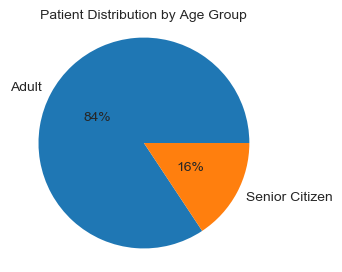

In [32]:
plt.figure(figsize=(3,3))
Age_Group_Survivor_Mod = pd.DataFrame({'Age_Group': ['Senior Citizen', 'Adult'],
                          'Count_of_Survivors': [SC_Ct, A_Ct]})
pie_plot = Age_Group_Survivor_Mod.Count_of_Survivors.groupby(Age_Group_Survivor_Mod.Age_Group).sum() \
                  .plot(kind='pie', autopct='%1.0f%%', pctdistance=0.5, radius=1.2)
plt.axis('equal')
plt.ylabel("")
#plt.xlabel("Age Group")
plt.title("Patient Distribution by Age Group", fontsize=10)
plt.show()

#### Observations

1. The sample population consists of only Adults (25 - 64 years) & Senior Citizens (65 years or more). Adults count is 84% (258), while the Seniors are 16% (48).

### 4.2 Find the count of Operations in a given range of year

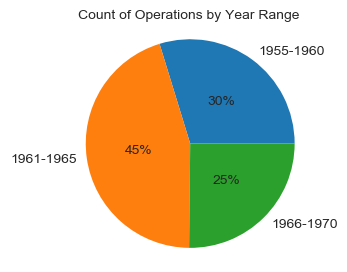

In [33]:
plt.figure(figsize=(3,3))
pie_plot = Year_Operations_Ct.Operations_Count.groupby(Year_Operations_Ct.Operation_Year_Range).sum() \
                  .plot(kind='pie', autopct='%1.0f%%', pctdistance=0.5, radius=1.2)
plt.axis('equal')
plt.ylabel("")
#plt.xlabel("Age Group")
plt.title("Count of Operations by Year Range", fontsize=10)
plt.show()

#### Observations

1. The maximum count of operation in a given 5 year range was between the year 1961 & 1965. This is 45% of the total operations 
   conducted. 
2. 30% of the operations hsppened between 1955 - 1960 and 25% between 1966-1970.

### 4.3 Find the distribution of patient by N Rating or Count of Positive Axillary Node

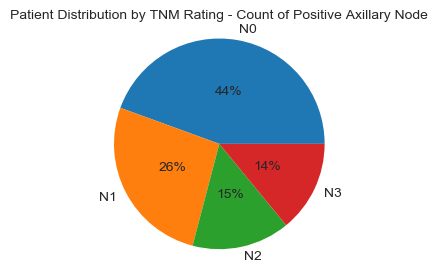

In [34]:
plt.figure(figsize=(3,3))
N_Rating_Ct.Total_Survivor_Count.groupby(N_Rating_Ct.TNM_Rating_N_Stage).sum() \
        .plot(kind='pie', autopct='%1.0f%%', pctdistance=0.5, radius=1.2)
plt.axis('equal')
plt.ylabel("")
plt.title("Patient Distribution by TNM Rating - Count of Positive Axillary Node", fontsize=10)
plt.show()

#### Observations

1. A total of 136 patients were in N0 rating (less than 1 Positive node detected) in the given sample. This is 44% of the sample
   population.  
2. A total of 81 patients were in N1 rating (less than 3 Positive node detected) in the given sample. This is 26% of the sample
   population.  
3. A total of 46 patients were in N2 rating (less than 10 Positive node detected) in the given sample. This is 15% of the sample
   population.  
4. A total of 43 patients were in N4 rating (more than 9 Positive node detected) in the given sample. This is 14% of the sample
   population.  

### 4.4 Find the distribution of patient survived 5 years or longer by N Rating or Count of Positive Axillary Node

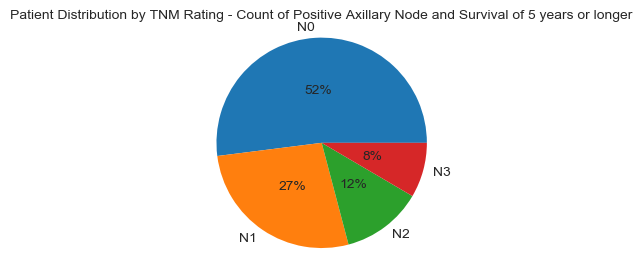

In [35]:
plt.figure(figsize=(3,3))
N_Rating_Survival_Ct.Survived_5_or_more.groupby(N_Rating_Ct.TNM_Rating_N_Stage).sum() \
                     .plot(kind='pie', autopct='%1.0f%%', pctdistance=0.5, radius=1.2)
plt.axis('equal')
plt.ylabel("")
plt.title("Patient Distribution by TNM Rating - Count of Positive Axillary Node and Survival of 5 years or longer", fontsize=10)
plt.show()

### Observations

1. Out of 136 patients in N0 rating (less than 1 Positive node detected) in the given sample, 117 survived 5 years or longer, 
   which is 52% of the sample size.  
2. Out of 81 patients in N1 rating (less than 3 Positive node detected) in the given sample, 61 survived 5 years or longer, 
   which is 27% of the sample size.  
3. A total of 46 patients were in N2 rating (less than 10 Positive node detected) in the given sample, 28 survived 5 years or 
   longer, which is 12% of the sample size.     
4. A total of 43 patients were in N4 rating (more than 9 Positive node detected) in the given sample, only 19 survived 5 years 
   or longer, which is 8% of the sample size.  
5. Looking at the N Rating and Survival status, it can be inferred that the likelyhood of survival beyond 5 years after 
   operation increases with lower N Rating or less count of Positive Nodes detected in a patient. 

### 4.5 Find the distribution of patient survived less than 5 years by N Rating or Count of Positive Axillary Node

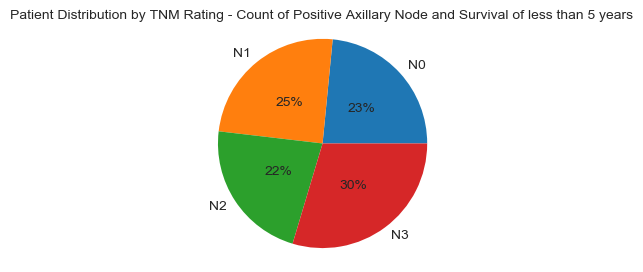

In [36]:
plt.figure(figsize=(3,3))
N_Rating_Survival_Ct.Survived_less_than_5.groupby(N_Rating_Ct.TNM_Rating_N_Stage).sum() \
                    .plot(kind='pie', autopct='%1.0f%%', pctdistance=0.5, radius=1.2)
plt.axis('equal')
plt.ylabel("")
plt.title("Patient Distribution by TNM Rating - Count of Positive Axillary Node and Survival of less than 5 years", fontsize=10)
plt.show()

### Observations

1. Out of 136 patients in N0 rating (less than 1 Positive node detected) in the given sample, 9 survived less than 5 years from 
   the Year of operation, which is 23% of the sample size.  
2. Out of 81 patients in N1 rating (less than 3 Positive node detected) in the given sample, 20 survived less than 5 years    from the Year of operation, which is 25% of the sample size.  
3. A total of 46 patients were in N2 rating (less than 10 Positive node detected) in the given sample, 18 survived less than 5 
   years from the Year of operation, which is 22% of the sample size.     
4. A total of 43 patients were in N4 rating (more than 9 Positive node detected) in the given sample, 24 survived less than 5   
   years from the Year of operation, which is 30% of the sample size.  
5. Looking at the N Rating and Survival status, it can be inferred that, as the count of Positive Nodes detected in a patient 
   increases, the percentage population which dies before 5 years from the Year of operation increases.

### 4.6 Find the relationship between Age & Year of Operation with the Survival Status

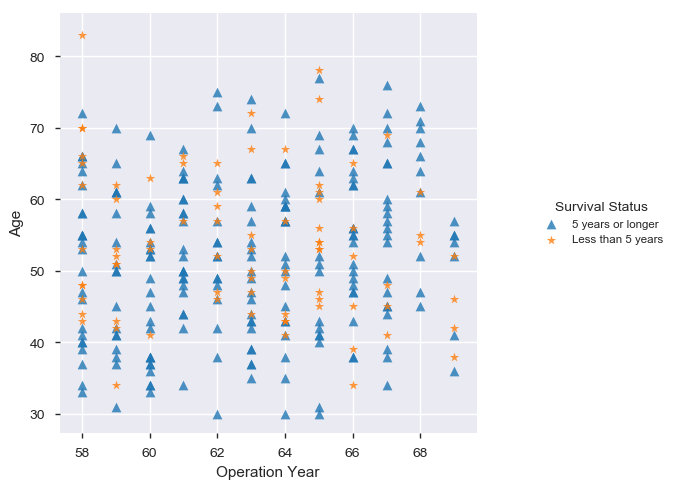

In [37]:
#Seaborn’s lmplot is a 2D scatterplot with an optional overlaid regression line. This is useful
#for comparing numeric variables.

sns.lmplot(x='Operation_Year', y='Age', markers=['^', '*'], hue='Survival_Status', 
           data=bcs_data.loc[bcs_data['Survival_Status'].isin(['1', '2'])], 
           fit_reg=False, legend=False)
plt.xlabel("Operation Year")
plt.legend(title='Survival Status', loc= 'center', bbox_to_anchor=(1.3, 0.5), fontsize = 'small', \
           labels=['5 years or longer', 'Less than 5 years'])

#### Observations

1. Most of the patients were in the Age range 40 - 70 years at the time of operation.
2. Higher percentage of the patients in the Age range 30 - 40 years at the time of operation, survived 5 years or longer.  
3. Only patient above 80 years of age at the time of operation, died within 5 years of the operation.
4. Most of the patients are in the age range 30 - 65 years i.e Adults.

### 4.7 Find the relationship between Age & Count of Aixllary Node with the Survival status

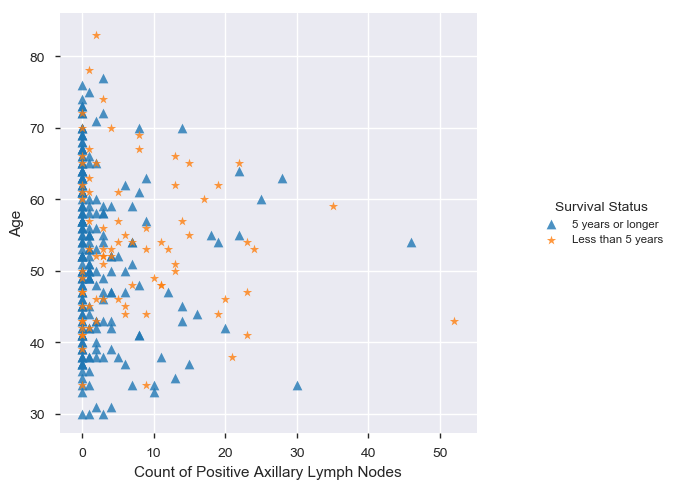

In [38]:
#Seaborn’s lmplot is a 2D scatterplot with an optional overlaid regression line. This is useful
#for comparing numeric variables.

sns.lmplot(x='Count_Pos_Axi_Lymph_Node', y='Age', markers=['^', '*'], hue='Survival_Status', 
           data=bcs_data.loc[bcs_data['Survival_Status'].isin(['1', '2'])], 
           fit_reg=False, legend=False)
plt.xlabel("Count of Positive Axillary Lymph Nodes")
plt.legend(title='Survival Status', loc= 'center', bbox_to_anchor=(1.3, 0.5), fontsize = 'small', \
           labels=['5 years or longer', 'Less than 5 years'])

#### Observations

1. Most of the patients had 0 Positive Axillary Node detected and they survived 5 years or longer after the operation.
2. Higher percentage of the patients with 4 or more Positive Axillary Node detected, survived less than 5 years after operation. 
3. Only patient with more than 50 Positive Axillary Node detected, died within 5 years of the operation.
4. Most of the patients in the age range 30 - 65 years i.e Adults had less than 10 Positive Axillary Node detected.

### 4.8 Find the relationship between count of Positive Axillary Lymph Node vs Age

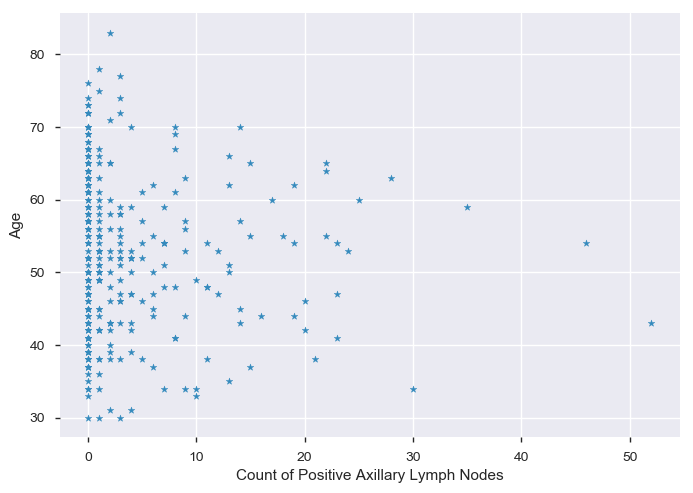

In [39]:
# Scatter plot for Count of Lymph Node vs Age
bcs_data.plot(kind='scatter', y='Age', x='Count_Pos_Axi_Lymph_Node', s= 25, marker='*')
plt.xlabel("Count of Positive Axillary Lymph Nodes")
plt.show()

#### Observations

1. Most of the patients had 0 Positive Axillary Node detected and they survived 5 years or longer after the operation.
2. Higher percentage of the patients had less that 10 Positive Axillary Node detected. 
3. Only 4 patient had 30 or more Positive Axillary Node detected.
4. Most of the patients in the age range 30 - 65 years i.e Adults had less tahn 10 Positive Axillary Node detected.

### 4.9 Find the relation between Survival Status vs Count of Positive Axillary Node detected

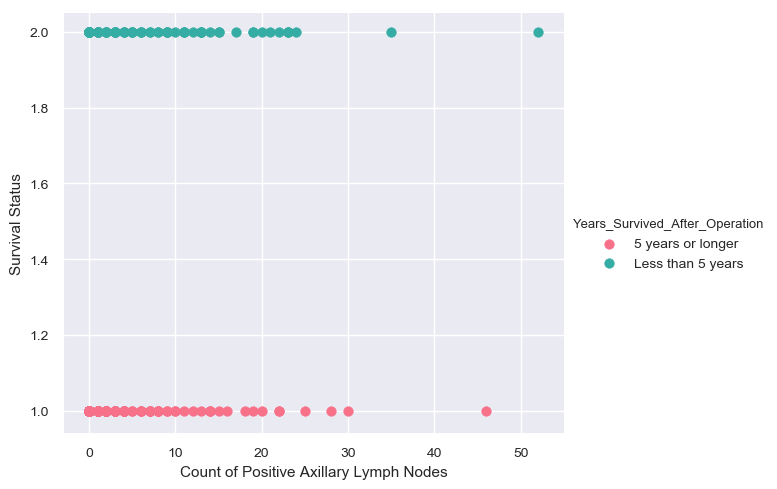

In [40]:
# 2-D Scatter plot with color-coding for each survival status type/class.
sns.set_style("darkgrid")
sns.FacetGrid(bcs_data, hue="Years_Survived_After_Operation", palette="husl",height=0.6, aspect= 1.2,size=5) \
   .map(plt.scatter, "Count_Pos_Axi_Lymph_Node", "Survival_Status") \
   .add_legend()
plt.xlabel("Count of Positive Axillary Lymph Nodes")
plt.ylabel("Survival Status")
plt.show()

#### Observations

1. Most of the patients with 15 or less Positive Axillary Node detected, survived 5 years or longer after the operation.
2. Higher percentage of the patients had less that 10 Positive Axillary Node detected. 
3. Only 4 patient had 30 or more Positive Axillary Node detected. Out of these 4, 2 survived 5 years or longer and 2 died 
   withinh 5 years of the year of operation.

### 4.10 Find the distribution of Years survived after operation against Count of Positive Node detected

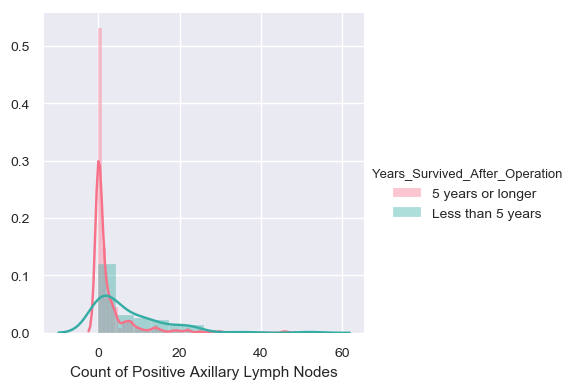

In [41]:
sns.FacetGrid(bcs_data, hue="Years_Survived_After_Operation", palette="husl", height=4) \
   .map(sns.distplot, "Count_Pos_Axi_Lymph_Node") \
   .add_legend();
plt.xlabel("Count of Positive Axillary Lymph Nodes")
plt.show();

#### Observations

1. Most of the patients with 15 or less Positive Axillary Node detected, survived 5 years or longer after the operation.
2. Higher percentage of the patients had less that 10 Positive Axillary Node detected. 
3. Only 4 patient had 30 or more Positive Axillary Node detected. Out of these 4, 2 survived 5 years or longer and 2 died 
   withinh 5 years of the year of operation.

### 4.11 Find the relationship between Year of Operation and Survival Status

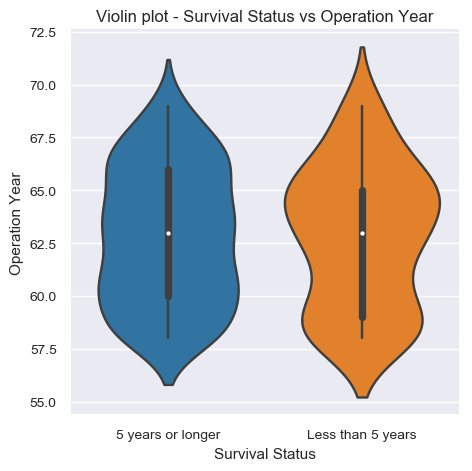

In [42]:
plt.figure(figsize=(5,5))
sns.violinplot(x = "Years_Survived_After_Operation", y = "Operation_Year",\
            scale="area", data = bcs_data)
plt.title("Violin plot - Survival Status vs Operation Year")
plt.xlabel("Survival Status")
plt.ylabel("Operation Year")
plt.show()

#### Observations

1. The plot for the patients who survived 5 years or longer after operation has more unifrom wider plot, and as a result there  
   is a higher probability that the patients who survives 5 years or longer after operation would have been operated between 
   1959-1968.

### 4.12 Find the relationship between Age, Year of Operation, Count of Nodes detected and Survival Status

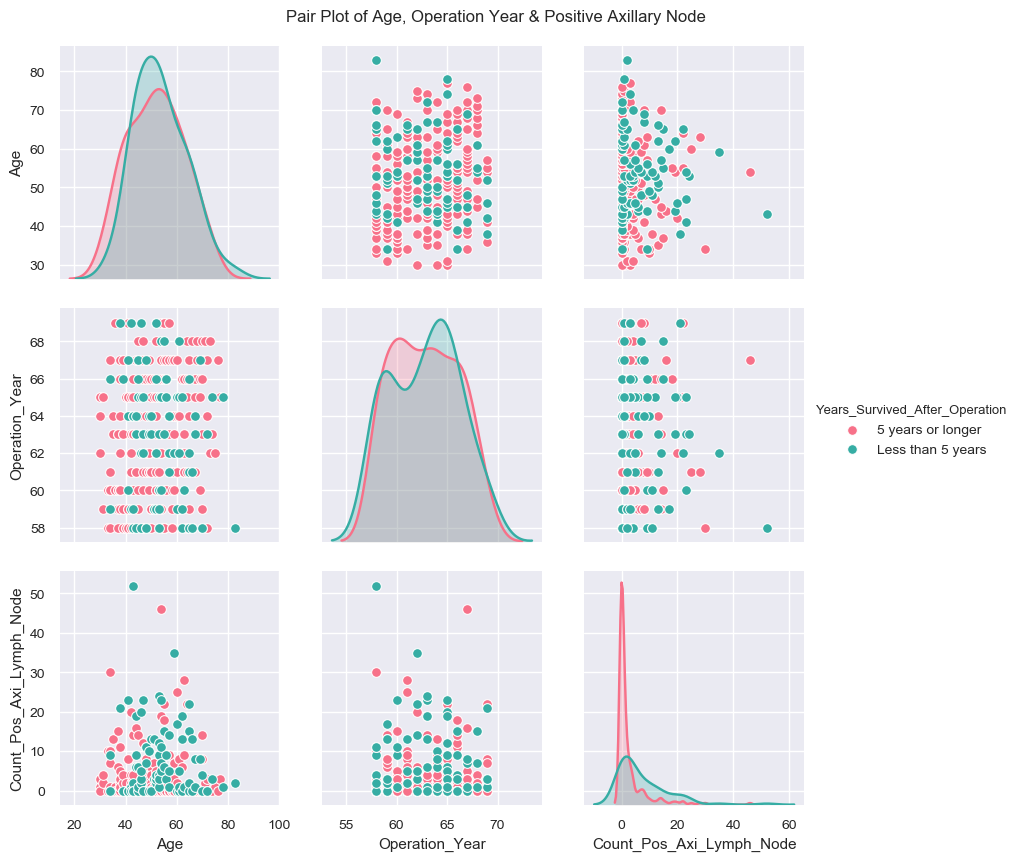

In [43]:
sns.set_style("darkgrid")
sns_plot = sns.pairplot(bcs_data, hue = "Years_Survived_After_Operation", palette="husl", \
             vars = ["Age", "Operation_Year", "Count_Pos_Axi_Lymph_Node"], size = 2.8)
sns_plot.fig.suptitle("Pair Plot of Age, Operation Year & Positive Axillary Node", y=1.02)
plt.show()

#### Observations

1. Most obeservations are convered under other plots in the notebook.

### 4.13 Find the relationship between Year of Operation & Survival status

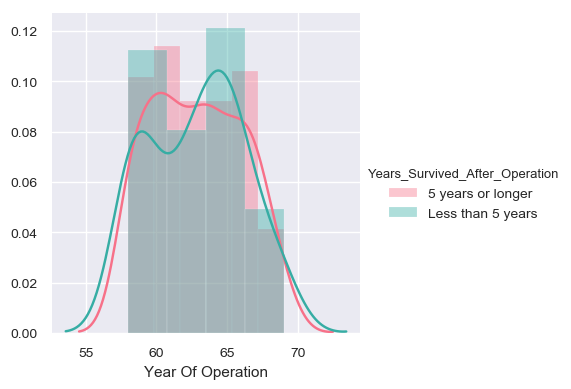

In [44]:
sns.FacetGrid(bcs_data, hue="Years_Survived_After_Operation", palette="husl", size=4) \
   .map(sns.distplot, "Operation_Year").add_legend();
plt.xlabel("Year Of Operation")
plt.show();

#### Observations

1. Most of the operation happened between 1958 - 1969 years.  
2. Most operations took place between 1962 - 1966. Larger percentage of this population, died within 5 years of the operation 
   date.
3. Number of operations reduced drastically betwenn years 1966 - 1970.

### 4.14 Find the relationship between Count of Nodes detected & Survival status

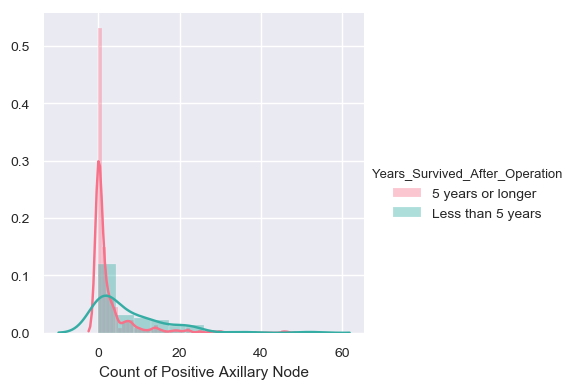

In [45]:
sns.FacetGrid(bcs_data, hue="Years_Survived_After_Operation", palette="husl", size=4) \
   .map(sns.distplot, "Count_Pos_Axi_Lymph_Node").add_legend();
plt.xlabel("Count of Positive Axillary Node")
plt.show();

#### Observations

1. Most of the patients with 15 or less Positive Axillary Node detected, survived 5 years or longer after the operation.
2. Higher percentage of the patients had less that 10 Positive Axillary Node detected. 

### 4.15 Find the relationship between Age & Survival status

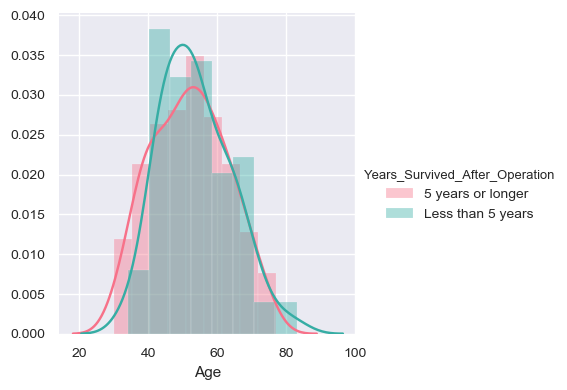

In [46]:
sns.FacetGrid(bcs_data, hue="Years_Survived_After_Operation", palette="husl",size=4) \
   .map(sns.distplot, "Age") \
   .add_legend();
plt.show();

#### Observations

1. Patients with age 30 to 79 at the time of operation, survived 5 years or longer with most between 43-60 years.
2. Patients with age 32 to 83 at the time of operation, survived less than 5 years with most between 46-61 years.
3. A larger percentage of patients in the age group 40-50, survived less than 5 years.

### 4.16 Find the pattern between Age & Survival status

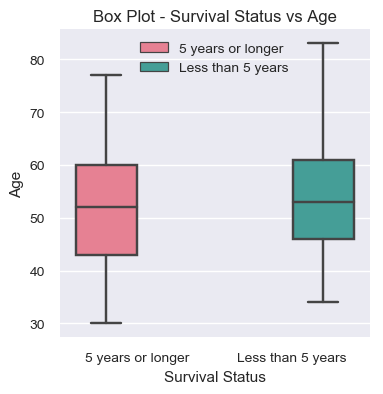

In [47]:
plt.figure(figsize=(4,4))
sns.boxplot(x = "Years_Survived_After_Operation", y = "Age", hue = "Years_Survived_After_Operation", palette="husl",\
            data = bcs_data).set_title("Box Plot - Survival Status vs Age", fontsize=12)
plt.xlabel("Survival Status")
plt.ylabel("Age")
plt.legend(loc = 9)
plt.show()

#### Observations

1. Patients with age 30 to 79 at the time of operation, survived 5 years or longer with most between 43-60 years.
2. Patients with age 32 to 83 at the time of operation, survived less than 5 years with most between 46-61 years.
3. A large number of patients survivied less than 5 years after operation fall between 61 - 83 years.

### 4.17 Find the pattern between Year of Operation & Survival status

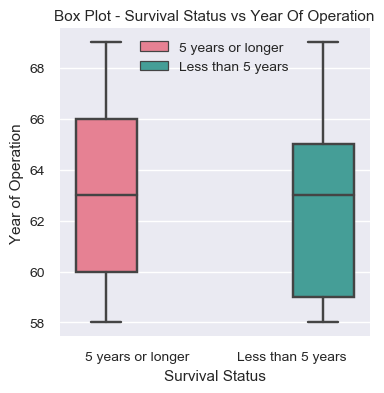

In [48]:
plt.figure(figsize=(4,4))
sns.boxplot(x = "Years_Survived_After_Operation", y = "Operation_Year", hue = "Years_Survived_After_Operation", palette="husl", \
            data = bcs_data).set_title("Box Plot - Survival Status vs Year Of Operation", fontsize=11)
plt.xlabel("Survival Status")
plt.ylabel("Year of Operation")
plt.legend(loc = 9)
plt.show()

#### Observations

1. We had both cases wherein, the patients who got operated in the year 1958 survived less than 5 years and 5 years or longer. 
   So, there is no direct co-relation between Year of operation and length of survival after operation.
2. We had both cases wherein, the patients who got operated in the year 1969 survived less than 5 years and 5 years or longer. 
   So, there is no direct co-relation between Year of operation and length of survival after operation.
3. The mean Year of operation for patients for both cases lies around 1963. 
4. Most of the operations for patients who survived 5 years or longer was between 1960 - 1966.
5. Most of the operations for patients who survived less than 5 years between 1959 - 1963.

### 4.18 Find the pattern between Count of Nodes detected & Survival status

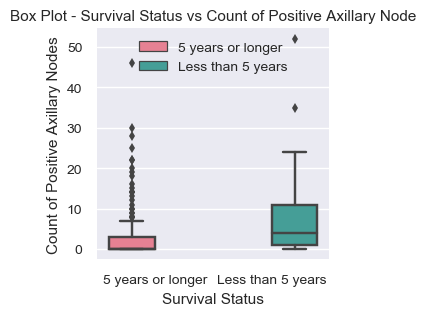

In [49]:
plt.figure(figsize=(3,3))
bcs_plot = sns.boxplot(x = "Years_Survived_After_Operation", y = "Count_Pos_Axi_Lymph_Node", \
                       hue = "Years_Survived_After_Operation", palette="husl", data = bcs_data) \
              .set_title("Box Plot - Survival Status vs Count of Positive Axillary Node", fontsize=11)
plt.xlabel("Survival Status")
plt.ylabel("Count of Positive Axillary Nodes")
plt.legend(loc = 9)
plt.show()

#### Observations

1. Most of the patients who survived 5 years or longer had 0 Positive Axillary Node detected.
2. Most of the patients who survived 5 years or longer had less than 10 Positive Axillary Node detected. This clearly shows a 
   co-relation between length of survival of a patient and count of Positive Axillary Node detected in him / her.
3. Most of the patients who survived less than 5 years had more than 9 Positive Axillary Node detected. This clearly shows a 
   co-relation between length of survival of a patient and count of Positive Axillary Node detected in him / her.

### 4.19 Establish co-orelation between all the features using heatmap

Text(0.5,1,'Correlation between features')

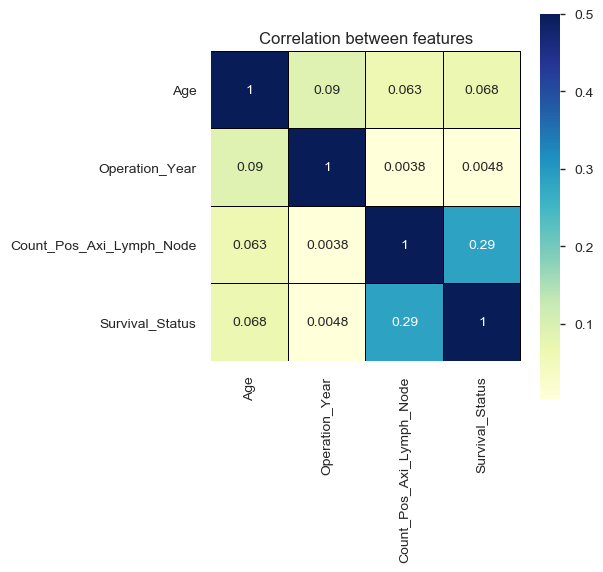

In [50]:
corr_matrix = bcs_data.corr().abs()
plt.figure(figsize=(5,5))
sns.heatmap(corr_matrix,vmax=.5,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

#### Observations

1. Survival Status has a good positive co-relation with the Count of Positive Axillary Node detected in the patient.
3. Age at the time of operation has a slighlty lower but similar co-relation between Count of Positive Axillary Node detected in the patient and 
   the Survival Status.

### 4.20 Hypothesis: Patients who had fewer Positive Axillary Nodes detected and got operated at a lower age has high likelihood to survive longer

The __observations__ for the __Questions__ __4.4__, __4.5__, __4.7__, __4.8__, __4.18__ and __4.19__ clearly shows the co-relation between the count of the  Positive Axillary Nodes detected in the patient and the age of the patient at the time of operation.

## 5. Conclusion 

- The most important inference drawn from all this analysis is, we get to know what are the __features on which survival is highly positively and negatively coorelated with__ e.g. relationship between __Survival Status__ with the __Count of Positive Axillary Nodes__ detected in the patient and the __Age__ of the patient at the time of operation.
- The observations from the prior slides clearly shows the co-relation between the __Count of Positive Axillary Nodes__ detected in the patient and the __Age__ of the patient at the time of operation to their length of __Survival post operation.
- With the help of this notebook we learnt how exploratory data analysis can be carried out using Pandas plotting.
- Also we have seen making use of packages like __matplotlib and seaborn__ to develop better insights about the data.<br/>
- We have also seen how __pre proceesing__ helps in dealing with irregualities present in the data. We also learnt how to __create new features__ which will in turn help us to better predict the survival. 
- We also make use of __pandas profiling__ feature to generate an html report containing all the information of the various features present in the dataset.
- This analysis will help us to choose which __machine learning model__ we can apply to predict survival of test dataset. 